## Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                    \
Ticker       ADA-USD     BNB-USD        BTC-USD   DOT-USD      ETH-USD   
Date                                                                     
2016-01-01       NaN         NaN     434.334015       NaN          NaN   
2016-01-02       NaN         NaN     433.437988       NaN          NaN   
2016-01-03       NaN         NaN     430.010986       NaN          NaN   
2016-01-04       NaN         NaN     433.091003       NaN          NaN   
2016-01-05       NaN         NaN     431.959991       NaN          NaN   
...              ...         ...            ...       ...          ...   
2025-01-06  1.094124  729.400085  102078.085938  7.766676  3688.611328   
2025-01-07  0.992010  697.368896   96922.703125  7.015230  3381.577393   
2025-01-08  0.948031  695.837158   95043.523438  6.761236  3326.329346   
2025-01-09  0.905990  685.120728   92484.039062  6.557372  3219.430664   
2025-01-10  0.950080  696.113281   94907.789062  6.710142  3301.736816   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-06  0.523440  218.723129  2.418807  1.094124  729.400085  ...   
2025-01-07  0.470071  202.230255  2.272350  0.992010  697.368896  ...   
2025-01-08  0.462149  197.559052  2.375305  0.948031  695.837158  ...   
2025-01-09  0.449210  185.025284  2.275212  0.905990  685.120728  ...   
2025-01-10  0.460268  191.354645  2.304068  0.950080  696.113281  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-06  213.394836  2.399726  1.303664e+09  2.056634e+09  51823432705   
2025-01-07  218.412933  2.418794  2.238100e+09  2.200353e+09  58685738547   
2025-01-08  202.227875  2.272360  1.978553e+09  2.189465e+09  63875859171   
2025-01-09  197.559052  2.375308  1.351716e+09  1.931493e+09  62777261693   
2025-01-10  185.027573  2.274793  1.289386e+09  1.826889e+09  59661299712   

Price                                                                          
Ticker          DOT-USD       ETH-USD   MATIC-USD       SOL-USD       XRP-USD  
Date                                                                           
2016-01-01          NaN           NaN         NaN           NaN           NaN  
2016-01-02          NaN           NaN         NaN           NaN           NaN  
2016-01-03          NaN           NaN         NaN           NaN           NaN  
2016-01-04          NaN           NaN         NaN           NaN           NaN  
2016-01-05          NaN           NaN         NaN           NaN           NaN  
...                 ...           ...         ...           ...           ...  
2025-01-06  376165033.0  2.397357e+10   5030571.0  3.408035e+09  4.383804e+09  
2025-01-07  512248161.0  3.223531e+10   5624802.0  4.360984e+

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,92435.82000000,92674.90000000,91283.30000000,92386.90000000,6.25289000,2025-01-09 23:59:59.999,575771.20578080,954,1.56775000,144633.02436690,0
2025-01-10 00:00:00,92449.35000000,93726.74000000,92449.35000000,93588.32000000,3.58263000,2025-01-10 03:59:59.999,333990.77903870,484,1.28603000,119667.60963440,0
2025-01-10 04:00:00,93589.61000000,95021.87000000,93589.61000000,94509.53000000,2.94711000,2025-01-10 07:59:59.999,277712.36405820,551,1.62967000,153538.19940660,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,92386.90,3223.02,0.90790,682.2400,2.27810,6.556,0.4486,186.20
2025-01-10 00:00:00,93588.32,3258.99,0.92120,687.9200,2.28690,6.629,0.4492,189.67
2025-01-10 04:00:00,94509.53,3298.67,0.96150,693.1500,2.31560,6.792,NaN,191.97
2025-01-10 08:00:00,94994.69,3311.46,0.95210,696.3300,2.30500,6.721,NaN,191.88


In [5]:
volume_dict = dict()

for coin in px_data:
    volume_dict[coin] = px_data[coin]["volume"]

volume_df = pd.DataFrame(volume_dict).astype(float)
volume_df = volume_df.reindex(pd.date_range(volume_df.index[0], volume_df.index[-1], freq='4h'))
volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,12.760445,116.96768,102547.5,178.050,413589.5,NaN,NaN,NaN
2020-01-01 04:00:00,1.111320,30.72021,123837.9,142.290,20155.3,NaN,NaN,NaN
2020-01-01 08:00:00,2.097358,67.41356,16867.6,452.150,29685.1,NaN,NaN,NaN
2020-01-01 12:00:00,7.531506,104.17904,24119.6,146.060,2491.5,NaN,NaN,NaN
2020-01-01 16:00:00,5.494401,24.96585,25282.5,188.870,24935.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,6.252890,58.15560,246655.4,56.476,113069.0,841.89,3670.2,966.514
2025-01-10 00:00:00,3.582630,29.21810,64246.1,19.366,29961.0,177.41,431.1,471.014
2025-01-10 04:00:00,2.947110,7.64970,225977.2,120.306,24195.0,454.63,NaN,259.336
2025-01-10 08:00:00,1.035250,1.15620,86318.9,29.151,7048.0,286.09,NaN,49.237


In [6]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.000474,0.004059,0.013621,0.002911,-0.003020,0.001834,0.002010,0.000968
2025-01-10 00:00:00,0.013004,0.011160,0.014649,0.008326,0.003863,0.011135,0.001337,0.018636
2025-01-10 04:00:00,0.009843,0.012176,0.043747,0.007603,0.012550,0.024589,NaN,0.012126
2025-01-10 08:00:00,0.005133,0.003877,-0.009776,0.004588,-0.004578,-0.010453,NaN,-0.000469


### Convenience Functions

In [7]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [8]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [9]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [10]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.031250,-0.156250,-0.093750,0.218750,0.156250,0.09375,0.03125,-0.21875
2025-01-10 00:00:00,0.093750,0.031250,-0.093750,0.218750,-0.156250,0.15625,-0.03125,-0.21875
2025-01-10 04:00:00,0.218750,-0.093750,0.031250,0.156250,-0.218750,0.09375,-0.03125,-0.15625
2025-01-10 08:00:00,0.093750,-0.156250,0.218750,-0.093750,-0.031250,0.15625,-0.21875,0.03125


In [11]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-1.084978,-0.229707,-0.579815,-0.650451,-0.405170,-0.634393,-1.240964,-1.260722,-1.125436
2025-01-10 00:00:00,0.291503,-0.454908,0.486008,0.050186,-0.996914,-0.352735,-1.315287,-0.707486,-1.000302
2025-01-10 04:00:00,2.682526,3.170795,1.921201,3.481724,4.056685,0.449672,-3.114624,-3.122295,-3.235151
2025-01-10 08:00:00,-2.383909,-1.512133,-1.303047,-0.203903,-1.548554,-1.532347,-0.372699,1.052093,1.048850


In [12]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-1.084978,-0.229707,-0.579815,-0.650451,-0.405170,-0.634393,-1.240964,-1.260722,-1.125436
2025-01-10 00:00:00,0.291503,-0.454908,0.486008,0.050186,-0.996914,-0.352735,-1.315287,-0.707486,-1.000302
2025-01-10 04:00:00,2.682526,3.170795,1.921201,3.481724,4.056685,0.449672,-3.114624,-3.122295,-3.235151
2025-01-10 08:00:00,-2.383909,-1.512133,-1.303047,-0.203903,-1.548554,-1.532347,-0.372699,1.052093,1.048850


In [13]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.647928
2    -0.712670
3     0.103820
4     0.871908
5     1.229540
6     0.615494
12    1.407918
18    1.546494
24    1.403395
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

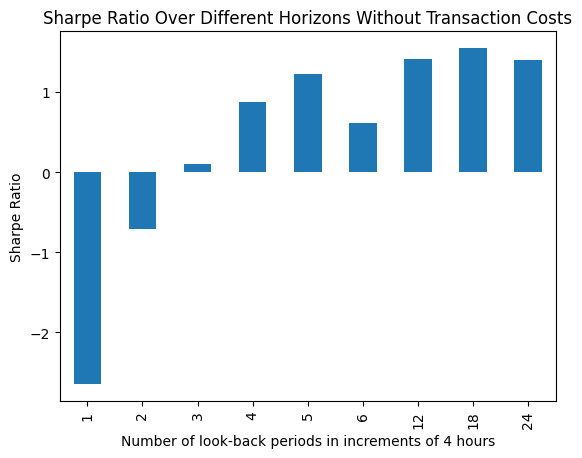

In [14]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [15]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-2.301093,3.189794,-0.242089,6.568806,2.334704,4.515829,3.223993,4.093569,-0.640182


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

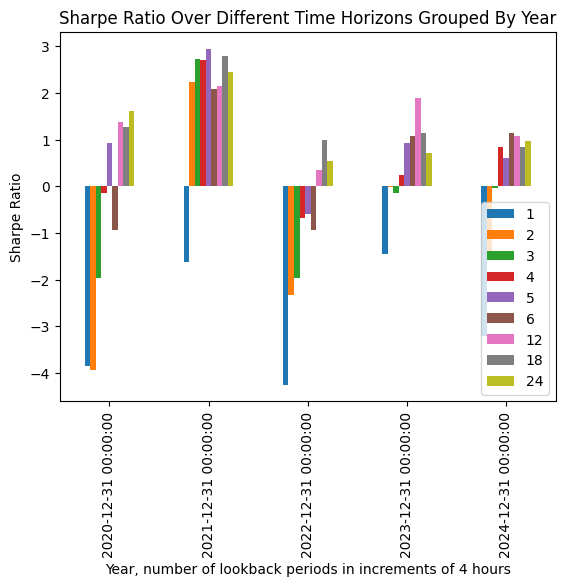

In [16]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [17]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.006223,-0.001879,-0.003589,-0.003782,-0.002860,-0.002988,-0.003400,-0.003704,-0.003833
2025-01-10 00:00:00,-0.002451,-0.003746,-0.000168,-0.001863,-0.004231,-0.002466,-0.003854,-0.002188,-0.002741
2025-01-10 04:00:00,0.004849,0.005437,0.003264,0.007289,0.008614,-0.000018,-0.008783,-0.008554,-0.009113
2025-01-10 08:00:00,-0.009531,-0.005393,-0.005570,-0.001309,-0.004993,-0.006698,-0.002771,0.002382,0.002124


In [18]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.732061
2    -13.349403
3    -10.406796
4     -8.112839
5     -6.962350
6     -6.892067
12    -3.974214
18    -2.871373
24    -2.372180
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

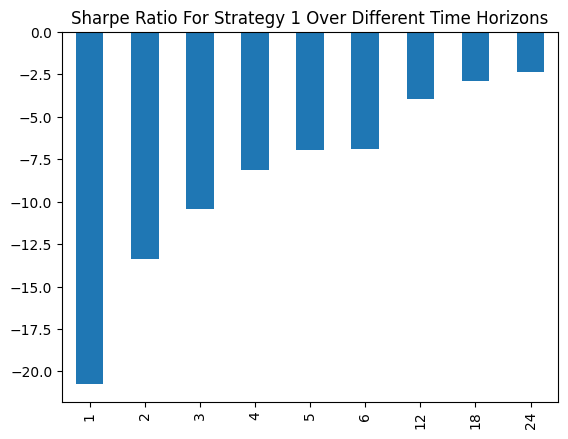

In [19]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [20]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-25.080522,-13.895089,-14.812716,-6.213697,-8.594166,-5.046697,-4.398369,-1.514936,-6.170215


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

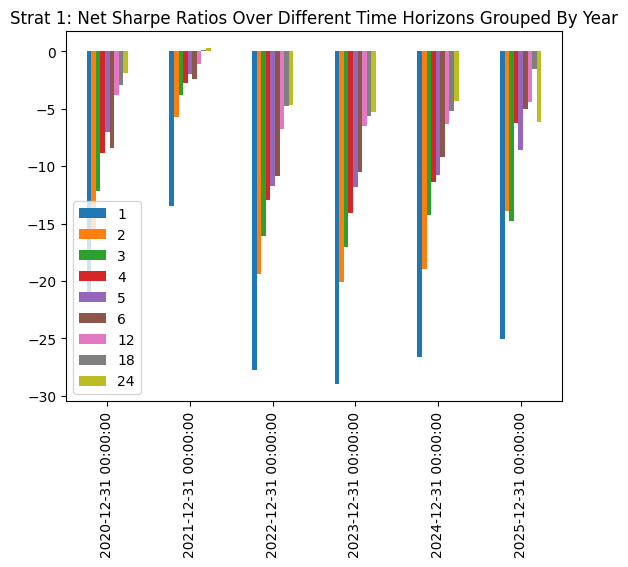

In [21]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [22]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [23]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,-0.5,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.000000,-0.5,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.500000,-0.5,0.000000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.500000,-0.5,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.000000,-0.208333,0.291667,0.0,0.208333,0.000000,-0.291667,0.000000
2025-01-10 00:00:00,0.208333,0.000000,0.291667,0.0,0.000000,-0.291667,-0.208333,0.000000
2025-01-10 04:00:00,0.000000,0.000000,0.291667,0.0,-0.208333,0.208333,-0.291667,0.000000
2025-01-10 08:00:00,0.000000,0.000000,0.291667,0.0,-0.208333,0.000000,-0.291667,0.208333


In [24]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,-0.500000,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.208333,0.000000,0.000000,0.291667,0.000000,-0.291667,0.000000,-0.208333
2025-01-10 00:00:00,0.000000,0.000000,0.291667,0.000000,-0.291667,0.000000,-0.208333,0.208333
2025-01-10 04:00:00,0.000000,0.000000,0.291667,-0.208333,0.000000,0.208333,-0.291667,0.000000
2025-01-10 08:00:00,0.000000,0.181818,0.318182,0.000000,-0.500000,0.000000,0.000000,0.000000


In [25]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.003863,-0.002214,-0.001480,-0.002435,-0.002172,-0.000908,-0.004449,-0.004629,-0.004135
2025-01-10 00:00:00,0.002762,-0.001993,0.002362,-0.001461,-0.003141,-0.001492,-0.005294,-0.003731,-0.003359
2025-01-10 04:00:00,0.010036,0.011626,0.007639,0.013226,0.015346,-0.001732,-0.010042,-0.012638,-0.013050
2025-01-10 08:00:00,-0.007305,-0.005985,-0.004076,-0.000828,-0.005985,-0.005837,-0.001510,0.001798,0.002562


In [26]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.007863,-0.005047,-0.003480,-0.005268,-0.004172,-0.002408,-0.004449,-0.004962,-0.005302
2025-01-10 00:00:00,-0.001238,-0.005159,0.000029,-0.004294,-0.005141,-0.003159,-0.005294,-0.003731,-0.003359
2025-01-10 04:00:00,0.007703,0.007626,0.005639,0.010060,0.011346,-0.003232,-0.010042,-0.012638,-0.013050
2025-01-10 08:00:00,-0.010472,-0.007985,-0.006076,-0.001662,-0.006818,-0.009837,-0.003510,0.000632,0.001396


In [27]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.140461,-8.080510,0.451281,0.454512,0.141137,-17.778449
2,-0.310856,-5.449674,0.451282,0.455770,0.057041,-11.957060
3,0.001029,-4.324811,0.460699,0.466032,-0.000238,-9.280072
4,0.381867,-3.409249,0.465114,0.469329,-0.112009,-7.264090
5,0.519406,-2.880628,0.458132,0.460887,-0.180310,-6.250184
6,0.341582,-2.806960,0.464715,0.468512,-0.121691,-5.991226
12,0.546313,-1.743286,0.471829,0.474333,-0.313381,-3.675237
18,0.523956,-1.338537,0.461732,0.464518,-0.391439,-2.881564
24,0.587357,-1.027008,0.462027,0.465010,-0.571911,-2.208573


In [28]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [29]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.140461,-8.080510,0.451281,0.454512,0.141137,-17.778449
2,-0.310856,-5.449674,0.451282,0.455770,0.057041,-11.957060
3,0.001029,-4.324811,0.460699,0.466032,-0.000238,-9.280072
4,0.381867,-3.409249,0.465114,0.469329,-0.112009,-7.264090
5,0.519406,-2.880628,0.458132,0.460887,-0.180310,-6.250184
6,0.341582,-2.806960,0.464715,0.468512,-0.121691,-5.991226
12,0.546313,-1.743286,0.471829,0.474333,-0.313381,-3.675237
18,0.523956,-1.338537,0.461732,0.464518,-0.391439,-2.881564
24,0.587357,-1.027008,0.462027,0.465010,-0.571911,-2.208573


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

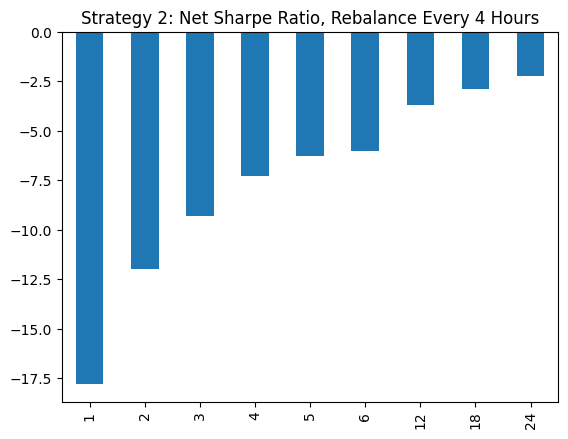

In [30]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [31]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.270686,-3.100752,0.328295,0.331172,-0.087297,-9.362964
2,0.417207,-2.049027,0.320117,0.321976,-0.203612,-6.363919
3,0.322450,-1.721574,0.335244,0.337701,-0.187300,-5.097927
4,0.477056,-1.289207,0.329562,0.331670,-0.370039,-3.887018
5,0.519431,-1.094356,0.333676,0.335737,-0.474645,-3.259560
6,0.573405,-0.875123,0.335829,0.337052,-0.655228,-2.596403
12,0.436483,-0.576986,0.318556,0.320278,-0.756488,-1.801516
18,0.324394,-0.516325,0.326628,0.328107,-0.628275,-1.573650
24,0.346989,-0.369904,0.330877,0.331971,-0.938050,-1.114267


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

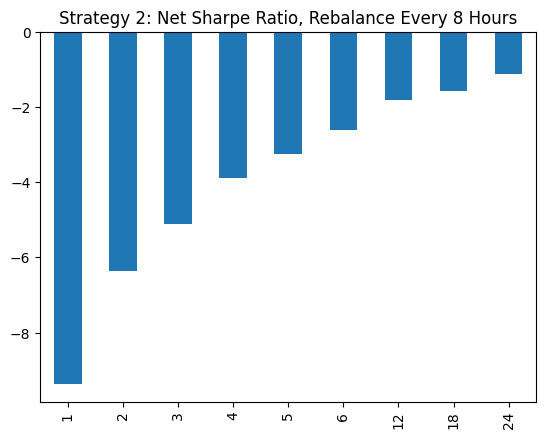

In [32]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [33]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.292188,-1.936898,0.267445,0.268629,-0.150854,-7.210318
2,0.107389,-1.545172,0.274176,0.275388,-0.069500,-5.610890
3,0.090119,-1.269327,0.272199,0.274222,-0.070998,-4.628826
4,0.182658,-0.986602,0.274084,0.274908,-0.185139,-3.588837
5,0.115130,-0.954410,0.275214,0.276986,-0.120630,-3.445701
6,0.073564,-0.909255,0.274999,0.276226,-0.080906,-3.291702
12,0.069371,-0.639754,0.264084,0.265241,-0.108434,-2.411968
18,0.043400,-0.547063,0.267054,0.267885,-0.079332,-2.042153
24,0.167394,-0.341403,0.280562,0.281102,-0.490313,-1.214517


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

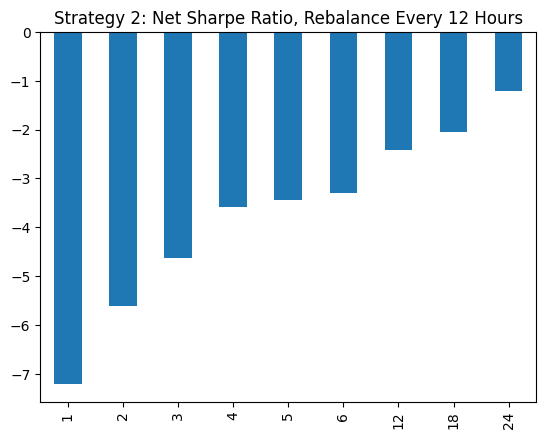

In [34]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [35]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.020417,-1.105826,0.180605,0.181781,-0.018463,-6.083295
2,0.086401,-0.728248,0.182132,0.183975,-0.118643,-3.958413
3,0.122055,-0.554665,0.180470,0.181948,-0.220052,-3.048481
4,-0.009251,-0.615371,0.180096,0.182411,0.015033,-3.373546
5,0.084094,-0.451878,0.182796,0.184194,-0.186100,-2.453280
6,0.102358,-0.387313,0.182774,0.184648,-0.264276,-2.097573
12,0.070052,-0.272390,0.190449,0.192856,-0.257177,-1.412398
18,0.120796,-0.156511,0.190072,0.191763,-0.771805,-0.816169
24,0.112867,-0.137237,0.189878,0.191563,-0.822428,-0.716403


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

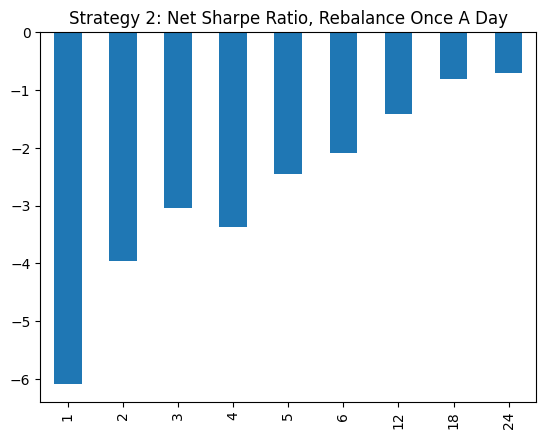

In [36]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [37]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.037218,-0.529259,0.130630,0.130551,-0.070321,-4.054026
2,-0.029148,-0.445097,0.128962,0.128990,0.065487,-3.450639
3,0.025195,-0.309193,0.130434,0.131910,-0.081486,-2.343969
4,-0.021716,-0.313952,0.133815,0.135478,0.069170,-2.317364
5,-0.030863,-0.291121,0.133033,0.133898,0.106013,-2.174195
6,0.002879,-0.236826,0.138924,0.140360,-0.012156,-1.687270
12,-0.006931,-0.187722,0.131415,0.131891,0.036921,-1.423310
18,0.026827,-0.111048,0.129196,0.130094,-0.241582,-0.853597
24,0.040322,-0.079332,0.119621,0.119841,-0.508268,-0.661975


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

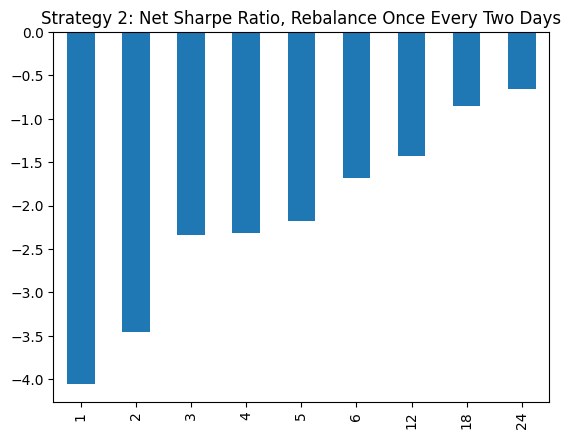

In [38]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [39]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.156250,-0.093750,-0.156250,0.093750,-0.031250,0.03125,0.21875,-0.21875
2025-01-10 00:00:00,0.093750,-0.156250,0.156250,0.031250,-0.031250,0.21875,-0.09375,-0.21875
2025-01-10 04:00:00,0.156250,-0.093750,0.218750,-0.156250,0.031250,-0.03125,-0.21875,0.09375
2025-01-10 08:00:00,0.156250,-0.093750,0.218750,0.031250,-0.156250,-0.03125,-0.21875,0.09375


In [40]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.156250,-0.093750,-0.156250,0.093750,-0.031250,0.03125,0.21875,-0.21875
2025-01-10 00:00:00,0.093750,-0.156250,0.156250,0.031250,-0.031250,0.21875,-0.09375,-0.21875
2025-01-10 04:00:00,0.156250,-0.093750,0.218750,-0.156250,0.031250,-0.03125,-0.21875,0.09375
2025-01-10 08:00:00,0.156250,-0.093750,0.218750,0.031250,-0.156250,-0.03125,-0.21875,0.09375


In [41]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-2.972543e-03,-0.000629,-0.001589,-0.001782,-0.001110,-0.001738,-0.003400,-0.003454,-0.003083
2025-01-10 00:00:00,7.986379e-04,-0.001246,0.001332,0.000137,-0.002731,-0.000966,-0.003604,-0.001938,-0.002741
2025-01-10 04:00:00,7.349387e-03,0.008687,0.005264,0.009539,0.011114,0.001232,-0.008533,-0.008554,-0.008863
2025-01-10 08:00:00,-6.531259e-03,-0.004143,-0.003570,-0.000559,-0.004243,-0.004198,-0.001021,0.002882,0.002874


In [42]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.002013,-0.002544,-0.003011,-0.001328,-0.000620,-0.004645,-0.003900,-0.003083,-0.004226
2025-01-10 00:00:00,-0.005333,-0.000051,-0.003418,-0.006080,-0.003274,-0.005340,-0.003488,-0.003269,-0.003491
2025-01-10 04:00:00,0.002746,-0.004005,0.008445,0.006427,-0.005603,-0.003406,-0.008637,-0.008804,-0.009621
2025-01-10 08:00:00,-0.002916,-0.004040,-0.000326,-0.004527,-0.005809,0.000015,0.003260,0.004104,0.004427


In [43]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.862359,-5.614971,0.325673,0.328591,-2.647928,-17.088009
2,-0.236614,-3.723175,0.332010,0.327638,-0.712670,-11.363679
3,0.034564,-2.785058,0.332922,0.331658,0.103820,-8.397384
4,0.296632,-2.356352,0.340210,0.332211,0.871908,-7.092942
5,0.413889,-2.271459,0.336621,0.333849,1.229540,-6.803852
6,0.208795,-2.040546,0.339232,0.329977,0.615494,-6.183911
12,0.475466,-1.220688,0.337708,0.332963,1.407918,-3.666142
18,0.515744,-0.834472,0.333492,0.329386,1.546494,-2.533420
24,0.473606,-0.678663,0.337472,0.333945,1.403395,-2.032260


In [44]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [45]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.862359,-5.614971,0.325673,0.328591,-2.647928,-17.088009
2,-0.236614,-3.723175,0.332010,0.327638,-0.712670,-11.363679
3,0.034564,-2.785058,0.332922,0.331658,0.103820,-8.397384
4,0.296632,-2.356352,0.340210,0.332211,0.871908,-7.092942
5,0.413889,-2.271459,0.336621,0.333849,1.229540,-6.803852
6,0.208795,-2.040546,0.339232,0.329977,0.615494,-6.183911
12,0.475466,-1.220688,0.337708,0.332963,1.407918,-3.666142
18,0.515744,-0.834472,0.333492,0.329386,1.546494,-2.533420
24,0.473606,-0.678663,0.337472,0.333945,1.403395,-2.032260


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

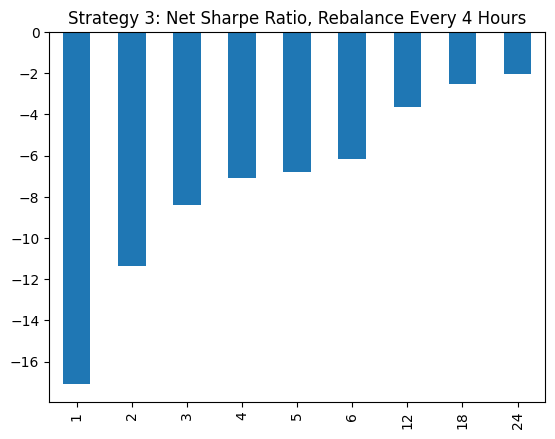

In [46]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [47]:
strat_3_net_sr_by_year = strat_3_net_returns_df.resample('YE').mean() / strat_3_net_returns_df.std() * np.sqrt(365 * 6)
strat_3_net_sr_by_year

,1,2,3,4,5,6,12,18,24
2020-12-31,-19.668835,-11.803899,-8.818590,-6.106463,-7.877479,-7.467866,-3.934800,-2.198296,-0.875739
2021-12-31,-12.504855,-7.348522,-5.013551,-4.259494,-4.081610,-3.504729,-1.235463,0.172507,0.123009
2022-12-31,-18.101641,-12.870455,-9.761243,-8.494691,-7.570265,-6.896683,-4.572147,-3.101715,-2.808993
2023-12-31,-17.552090,-13.041847,-9.966098,-8.458951,-7.602125,-6.441941,-4.212263,-3.693470,-3.451529
2024-12-31,-17.624097,-11.709027,-8.518942,-8.125881,-6.933219,-6.691378,-4.448472,-3.791385,-3.071089
2025-12-31,-16.332404,-12.968212,-4.886121,-7.814376,-4.963765,-2.863025,-0.822449,-4.504993,-4.950284


<Axes: >

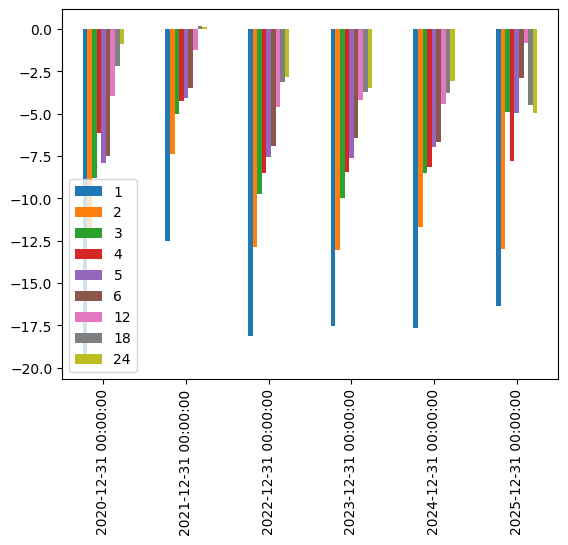

In [48]:
strat_3_net_sr_by_year.plot(kind='bar')

In [49]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.197976,-2.620114,0.237991,0.228959,0.831865,-11.443598
2,0.286409,-1.870023,0.234215,0.239777,1.222844,-7.799005
3,0.240246,-1.482445,0.243810,0.240634,0.985384,-6.160576
4,0.326127,-1.279762,0.240805,0.238359,1.354318,-5.369058
5,0.413813,-1.045012,0.242495,0.240669,1.706477,-4.342117
6,0.420814,-0.919017,0.241844,0.235980,1.740026,-3.894468
12,0.307837,-0.641175,0.230559,0.232398,1.335180,-2.758954
18,0.204774,-0.527140,0.237188,0.233809,0.863342,-2.254577
24,0.287093,-0.424459,0.237990,0.235556,1.206325,-1.801946


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

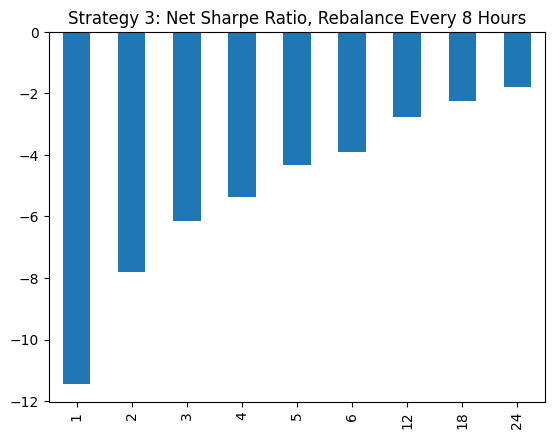

In [50]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [51]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.212724,-1.967506,0.196310,0.199074,1.083614,-9.883299
2,0.082599,-1.390203,0.199728,0.205891,0.413559,-6.752121
3,0.070760,-1.137951,0.199486,0.198798,0.354712,-5.724162
4,0.105627,-1.031728,0.200633,0.203628,0.526467,-5.066720
5,0.057052,-0.907427,0.201713,0.203646,0.282839,-4.455906
6,0.049446,-0.832116,0.201524,0.202184,0.245361,-4.115641
12,0.075245,-0.594787,0.193842,0.194470,0.388176,-3.058495
18,0.031180,-0.437477,0.196403,0.200341,0.158758,-2.183660
24,0.156025,-0.360817,0.202599,0.199648,0.770120,-1.807270


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

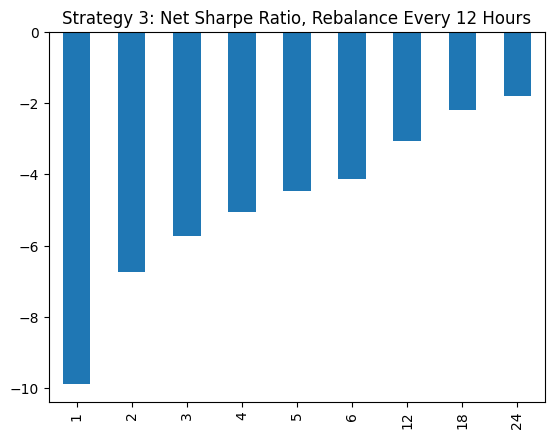

In [52]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [53]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.008174,-0.877064,0.135516,0.129954,0.060320,-6.749038
2,0.083768,-0.552219,0.132106,0.129515,0.634097,-4.263736
3,0.057333,-0.480762,0.132106,0.126962,0.433996,-3.786670
4,-0.005500,-0.407201,0.128603,0.128073,-0.042767,-3.179437
5,0.026624,-0.328581,0.130764,0.132337,0.203605,-2.482911
6,0.046506,-0.277453,0.132867,0.132057,0.350021,-2.101013
12,0.052940,-0.137596,0.138707,0.128120,0.381671,-1.073963
18,0.108586,-0.102589,0.136445,0.133645,0.795820,-0.767623
24,0.097686,-0.073461,0.134725,0.129774,0.725080,-0.566070


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

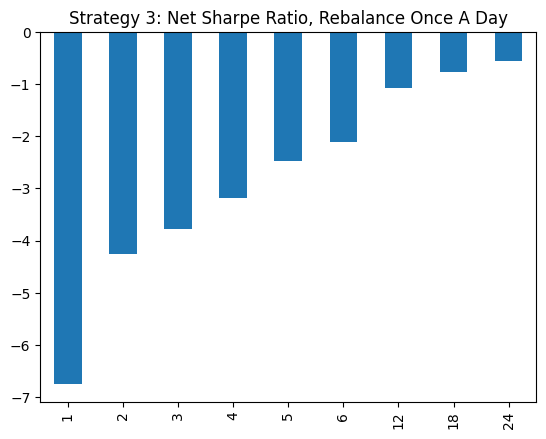

In [54]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [55]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.063696,-0.442132,0.096410,0.094631,0.660685,-4.672144
2,0.037806,-0.351751,0.095991,0.094352,0.393853,-3.728074
3,0.031634,-0.291043,0.097261,0.091559,0.325253,-3.178759
4,-0.015094,-0.263367,0.094624,0.089812,-0.159513,-2.932411
5,-0.014681,-0.216256,0.096173,0.098359,-0.152655,-2.198649
6,-0.005414,-0.208075,0.098941,0.100427,-0.054720,-2.071899
12,0.011996,-0.120851,0.099751,0.095966,0.120260,-1.259301
18,0.042410,-0.074858,0.094874,0.095614,0.447018,-0.782917
24,0.029992,-0.049699,0.097509,0.097341,0.307583,-0.510572


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

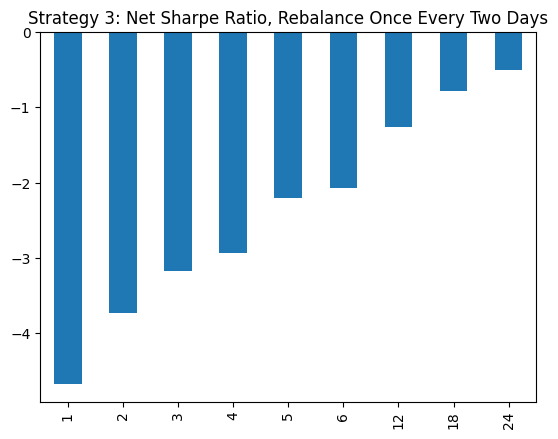

In [56]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

Try using exponential decay for the moving average: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [57]:
def get_strat_4_signal(volume_df, window_look_back):
    volume_change = (volume_df / volume_df.shift() - 1).rolling(window=window_look_back, min_periods=1).mean()
    demeaned_volume_change = volume_change.rank(axis=1).subtract(volume_change.rank(axis=1).mean(axis=1), axis=0)
    return demeaned_volume_change.divide(demeaned_volume_change.abs().sum(axis=1), axis=0)

get_strat_4_signal(volume_df, 6)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.093750,-0.031250,0.218750,0.093750,-0.218750,0.15625,-0.15625,0.03125
2025-01-10 00:00:00,-0.156250,-0.031250,0.218750,0.156250,-0.218750,0.09375,-0.09375,0.03125
2025-01-10 04:00:00,-0.218750,-0.093750,0.156250,0.218750,-0.156250,0.09375,-0.03125,0.03125
2025-01-10 08:00:00,-0.031250,-0.093750,0.218750,0.093750,-0.156250,0.15625,0.03125,-0.21875


In [58]:
def get_strat_4_signal_time_horizon_dict(volume_df):
    strat_4_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_4_signal_dict[t] = get_strat_4_signal(volume_df, t)
    return strat_4_signal_dict

strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
strat_4_signals_data[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.093750,-0.031250,0.218750,0.093750,-0.218750,0.15625,-0.15625,0.03125
2025-01-10 00:00:00,-0.156250,-0.031250,0.218750,0.156250,-0.218750,0.09375,-0.09375,0.03125
2025-01-10 04:00:00,-0.218750,-0.093750,0.156250,0.218750,-0.156250,0.09375,-0.03125,0.03125
2025-01-10 08:00:00,-0.031250,-0.093750,0.218750,0.093750,-0.156250,0.15625,0.03125,-0.21875


In [59]:
def get_strat_4_gross_returns(strat_4_signals_data, ret):
    strat_4_gross_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_gross_returns_data[t] = (strat_4_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_4_gross_returns_data)

strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
strat_4_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469
2020-01-01 12:00:00,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
2020-01-01 16:00:00,-0.000210,-0.001239,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.002705,0.002101,0.002636,0.002630,0.002534,0.002534,0.000416,-0.000110,-0.001963
2025-01-10 00:00:00,-0.002429,-0.001245,-0.000728,0.002415,0.002342,0.003685,-0.000048,-0.000483,-0.001894
2025-01-10 04:00:00,-0.002905,-0.002547,-0.003415,0.008468,0.008752,0.008778,-0.003416,-0.005879,-0.007609
2025-01-10 08:00:00,-0.001863,-0.001762,-0.001701,-0.000975,-0.003048,-0.002290,-0.002231,0.001920,-0.001343


In [60]:
def get_strat_4_net_returns(strat_4_signals_data, ret):
    strat_4_net_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_net_returns_data[t] = get_net_return(strat_4_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_4_net_returns_data)

strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
strat_4_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
2020-01-01 12:00:00,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674
2020-01-01 16:00:00,-0.002876,-0.003239,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248
...,...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.005205,-0.000649,0.001386,0.001880,0.001534,0.000534,0.000166,-0.000110,-0.002213
2025-01-10 00:00:00,-0.004679,-0.003495,-0.002978,0.001665,0.001342,0.002685,-0.000548,-0.000733,-0.001894
2025-01-10 04:00:00,-0.004905,-0.004547,-0.005915,0.006468,0.008002,0.008278,-0.003416,-0.006379,-0.007859
2025-01-10 08:00:00,-0.005613,-0.004012,-0.004451,-0.002725,-0.004548,-0.003040,-0.002981,0.001670,-0.001593


In [61]:
# strat_4_net_returns_df.mean()

def get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day):
    strat_4_results_stats_data = dict()
    strat_4_results_stats_data["gross_mean"] = strat_4_gross_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["gross_std"] = strat_4_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["net_mean"] = strat_4_net_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["net_std"] = strat_4_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["gross_sr"] = strat_4_results_stats_data["gross_mean"] / strat_4_results_stats_data["gross_std"]
    strat_4_results_stats_data["net_sr"] = strat_4_results_stats_data["net_mean"] / strat_4_results_stats_data["net_std"]
    return pd.DataFrame(strat_4_results_stats_data)

get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, 6)

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.052759,0.295628,-6.824168,0.297328,0.178464,-22.951667
2,0.308054,0.295468,-4.627183,0.299073,1.042596,-15.471749
3,0.195618,0.296772,-3.802507,0.300639,0.659152,-12.648078
4,0.245502,0.295943,-3.241398,0.299908,0.829560,-10.807985
5,0.295736,0.294210,-2.773472,0.297484,1.005187,-9.323096
6,0.392836,0.299713,-2.261327,0.302353,1.310710,-7.479108
12,0.231260,0.300162,-1.481077,0.301794,0.770449,-4.907579
18,0.054774,0.301832,-1.214761,0.302695,0.181471,-4.013153
24,-0.013583,0.304778,-1.021630,0.306096,-0.044566,-3.337619


In [62]:
def get_strat_4_results(ret, volume_df, periods_per_day):
    strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
    strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
    strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
    return get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day)

In [63]:
strat_4_4hr_results = get_strat_4_results(ret, volume_df, 6)
strat_4_4hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.052759,0.295628,-6.824168,0.297328,0.178464,-22.951667
2,0.308054,0.295468,-4.627183,0.299073,1.042596,-15.471749
3,0.195618,0.296772,-3.802507,0.300639,0.659152,-12.648078
4,0.245502,0.295943,-3.241398,0.299908,0.829560,-10.807985
5,0.295736,0.294210,-2.773472,0.297484,1.005187,-9.323096
6,0.392836,0.299713,-2.261327,0.302353,1.310710,-7.479108
12,0.231260,0.300162,-1.481077,0.301794,0.770449,-4.907579
18,0.054774,0.301832,-1.214761,0.302695,0.181471,-4.013153
24,-0.013583,0.304778,-1.021630,0.306096,-0.044566,-3.337619


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

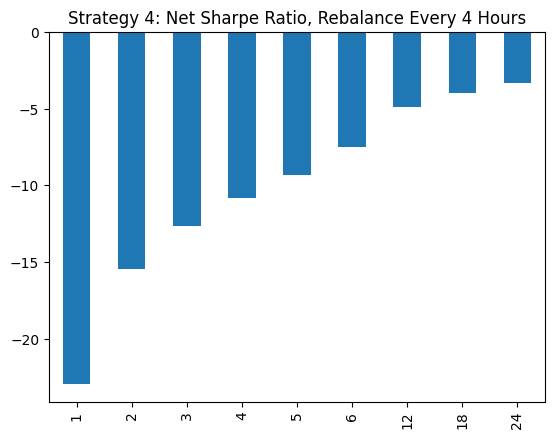

In [64]:
strat_4_4hr_results["net_sr"].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [65]:
strat_4_8hr_results = get_strat_4_results(ret[::2], volume_df[::2], 3)
strat_4_8hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.102332,0.216696,-3.420639,0.217245,0.472237,-15.745536
2,0.052003,0.213323,-2.420618,0.215957,0.243775,-11.208779
3,0.129976,0.218202,-1.720514,0.220469,0.595668,-7.803898
4,0.154465,0.217386,-1.487094,0.219778,0.710555,-6.766348
5,0.237176,0.217760,-1.234149,0.219918,1.089158,-5.611864
6,0.242678,0.219339,-0.994758,0.221191,1.106405,-4.497290
12,0.169566,0.220823,-0.601433,0.221815,0.767880,-2.711421
18,0.127957,0.214611,-0.439747,0.215454,0.596226,-2.041030
24,0.143207,0.214553,-0.323849,0.215177,0.667465,-1.505036


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

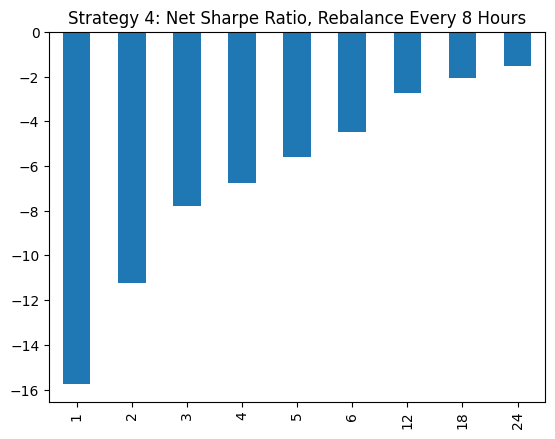

In [66]:
strat_4_8hr_results['net_sr'].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [67]:
strat_4_12hr_results = get_strat_4_results(ret[::3], volume_df[::3], 2)
strat_4_12hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.077916,0.183897,-2.287716,0.184250,0.423692,-12.416350
2,0.061474,0.185404,-1.576798,0.186331,0.331567,-8.462355
3,0.059066,0.182781,-1.313636,0.184048,0.323153,-7.137453
4,0.102494,0.183843,-1.052349,0.185364,0.557507,-5.677194
5,0.015955,0.186928,-1.030655,0.188424,0.085353,-5.469870
6,0.029982,0.187968,-0.892450,0.189225,0.159504,-4.716352
12,0.072257,0.182508,-0.522965,0.182940,0.395913,-2.858662
18,0.041766,0.184024,-0.409660,0.184060,0.226960,-2.225687
24,0.054678,0.178871,-0.304234,0.179599,0.305685,-1.693963


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

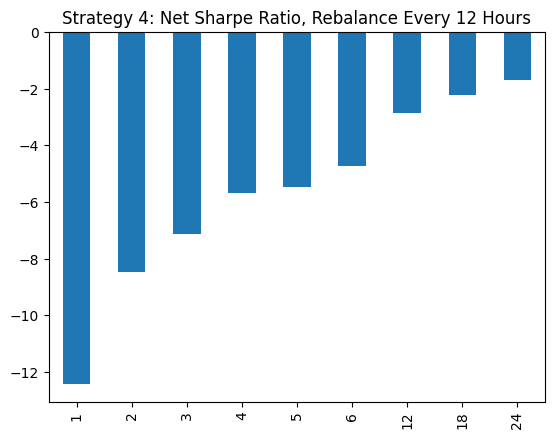

In [68]:
strat_4_12hr_results["net_sr"].plot(kind="bar",
                                    title="Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours")

In [69]:
strat_4_1d_results = get_strat_4_results(ret[::6], volume_df[::6], 1)
strat_4_1d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.048106,0.123281,-1.126485,0.123795,0.390211,-9.099586
2,-0.021957,0.127167,-0.850951,0.128240,-0.172665,-6.635600
3,0.025156,0.131744,-0.649761,0.133411,0.190949,-4.870376
4,0.001802,0.129613,-0.580829,0.130750,0.013899,-4.442291
5,0.013889,0.120176,-0.504365,0.121473,0.115571,-4.152067
6,-0.010301,0.117390,-0.479132,0.118686,-0.087750,-4.036969
12,-0.014555,0.119923,-0.312959,0.120584,-0.121367,-2.595366
18,0.014281,0.124129,-0.213176,0.124796,0.115049,-1.708193
24,0.005094,0.116441,-0.180127,0.116391,0.043750,-1.547606


In [70]:
strat_4_2d_results = get_strat_4_results(ret[::12], volume_df[::12], 0.5)
strat_4_2d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,-0.018810,0.091230,-0.603399,0.091750,-0.206183,-6.576562
2,-0.001677,0.089409,-0.410849,0.091345,-0.018759,-4.497766
3,-0.001971,0.087574,-0.323015,0.088600,-0.022505,-3.645775
4,0.020366,0.088198,-0.259945,0.088886,0.230913,-2.924487
5,0.008127,0.091009,-0.244703,0.091551,0.089299,-2.672868
6,0.010553,0.093235,-0.213570,0.094030,0.113189,-2.271303
12,0.006567,0.086756,-0.129947,0.087182,0.075696,-1.490526
18,-0.031267,0.094302,-0.134473,0.094600,-0.331562,-1.421500
24,-0.017785,0.095195,-0.106909,0.095488,-0.186830,-1.119605


In [88]:
exponential_volume_change = (volume_df / volume_df.shift() - 1).ewm(alpha=0.1).mean()
exponential_volume_change

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.034552,0.279374,-0.356284,1.051004,-0.201748,NaN,NaN,NaN
2020-01-01 12:00:00,0.977872,0.377529,-0.066166,0.413377,-0.465335,NaN,NaN,NaN
2020-01-01 16:00:00,0.614874,0.046652,-0.032906,0.378402,2.289373,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.363017,0.862867,0.740254,0.852553,0.672795,1.311851,4.267727,1.807675
2025-01-10 00:00:00,0.284011,0.726822,0.592275,0.701588,0.532013,1.101739,3.752700,1.575640
2025-01-10 04:00:00,0.237871,0.580321,0.784785,1.152652,0.459567,1.147824,3.752700,1.373136
2025-01-10 08:00:00,0.149212,0.437403,0.644504,0.961617,0.342740,0.995970,3.752700,1.154808


In [89]:
demeaned_exponential_volume_change = exponential_volume_change.rank(axis=1).subtract(
    exponential_volume_change.rank(axis=1).mean(axis=1), axis=0)
exponential_volume_holdings = demeaned_exponential_volume_change.divide(demeaned_exponential_volume_change.abs().sum(axis=1), axis=0)
exponential_volume_holdings

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.218750,0.031250,-0.093750,-0.031250,-0.156250,0.09375,0.21875,0.15625
2025-01-10 00:00:00,-0.218750,0.031250,-0.093750,-0.031250,-0.156250,0.09375,0.21875,0.15625
2025-01-10 04:00:00,-0.218750,-0.093750,-0.031250,0.093750,-0.156250,0.03125,0.21875,0.15625
2025-01-10 08:00:00,-0.218750,-0.093750,-0.031250,0.031250,-0.156250,0.09375,0.21875,0.15625


In [90]:
exponential_volume_gross_returns = (exponential_volume_holdings.shift() * ret).sum(axis=1)
exponential_volume_gross_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.002469
2020-01-01 12:00:00   -0.001008
2020-01-01 16:00:00   -0.002248
                         ...   
2025-01-09 20:00:00   -0.000110
2025-01-10 00:00:00   -0.000485
2025-01-10 04:00:00   -0.003873
2025-01-10 08:00:00   -0.000435
2025-01-10 12:00:00    0.000054
Freq: 4h, Length: 11020, dtype: float64

In [91]:
exponential_volume_gross_returns.mean() * 365 * 6

0.18592992116562207

In [92]:
exponential_volume_gross_returns.mean() / exponential_volume_gross_returns.std() * np.sqrt(365 * 6)

0.632918097748981

In [93]:
exponential_volume_net_returns = get_net_return(exponential_volume_holdings.shift(), ret)
exponential_volume_net_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000469
2020-01-01 12:00:00   -0.003674
2020-01-01 16:00:00   -0.004248
                         ...   
2025-01-09 20:00:00   -0.000610
2025-01-10 00:00:00   -0.000485
2025-01-10 04:00:00   -0.003873
2025-01-10 08:00:00   -0.001185
2025-01-10 12:00:00   -0.000196
Freq: 4h, Length: 11020, dtype: float64

In [94]:
exponential_volume_net_returns.mean() * 365 * 6

-1.1659418649807787

Try weighting earlier volume changes more.

In [95]:
volume_change_df = volume_df / volume_df.shift() - 1
volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.887267,1.194437,-0.863793,2.177665,0.472819,NaN,NaN,NaN
2020-01-01 12:00:00,2.590949,0.545372,0.429937,-0.676966,-0.916069,NaN,NaN,NaN
2020-01-01 16:00:00,-0.270478,-0.760356,0.048214,0.293099,9.008108,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,0.489493,1.075903,0.411917,1.234461,0.908692,-0.799042,0.463222,0.152277
2025-01-10 00:00:00,-0.427044,-0.497588,-0.739531,-0.657093,-0.735020,-0.789272,-0.882540,-0.512667
2025-01-10 04:00:00,-0.177389,-0.738186,2.517368,5.212228,-0.192450,1.562595,NaN,-0.449409
2025-01-10 08:00:00,-0.648724,-0.848857,-0.618019,-0.757693,-0.708700,-0.370719,NaN,-0.810142


In [100]:
reverse_exponential_weighting = (volume_change_df + 2 * volume_change_df.shift() + 4 * volume_change_df.shift(2) + 8 * volume_change_df.shift(3)) / 15
reverse_exponential_weighting

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.077148,-0.052717,-0.059078,0.402873,0.097140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.043529,0.331835,1.932760,2.486267,0.509465,1.303176,0.498830,3.110475
2025-01-10 00:00:00,0.341052,0.430024,3.266724,-0.382740,0.010371,2.759839,1.497473,-0.089687
2025-01-10 04:00:00,0.232080,0.217586,-0.132992,0.391751,0.021127,1.190594,NaN,-0.276358
2025-01-10 08:00:00,0.080284,0.286110,0.316929,1.127605,0.215724,-0.452997,NaN,-0.169427


In [107]:
ranked_rew = reverse_exponential_weighting.rank(axis=1).subtract(reverse_exponential_weighting.rank(axis=1).mean(axis=1), axis=0)
rrew = ranked_rew.divide(ranked_rew.abs().sum(axis=1), axis=0)
rrew

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.000000,-0.166667,-0.333333,0.333333,0.166667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-09 20:00:00,-0.218750,-0.156250,0.093750,0.156250,-0.031250,0.031250,-0.09375,0.218750
2025-01-10 00:00:00,-0.031250,0.031250,0.218750,-0.218750,-0.093750,0.156250,0.09375,-0.156250
2025-01-10 04:00:00,0.083333,0.000000,-0.166667,0.166667,-0.083333,0.250000,NaN,-0.250000
2025-01-10 08:00:00,-0.083333,0.083333,0.166667,0.250000,0.000000,-0.250000,NaN,-0.166667


In [109]:
get_net_return(rrew.shift(), ret).mean() * 365 * 6

-4.299092765992869

Try grouping data by day (less specific granularity).

In [116]:
daily_volume_df = volume_df.groupby(volume_df.index.date).sum()
daily_volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,31.403883,419.85641,333132.3,1210.780,568474.4,0.00,0.0,0.000
2020-01-02,67.004407,298.29122,257302.4,2052.780,124152.7,0.00,0.0,0.000
2020-01-03,102.621386,513.53291,422872.0,7458.020,183712.9,0.00,0.0,0.000
2020-01-04,32.271372,87.49993,199212.9,1956.270,96464.2,0.00,0.0,0.000
2020-01-05,67.247638,275.28558,553095.4,2998.830,168050.5,0.00,0.0,0.000
...,...,...,...,...,...,...,...,...
2025-01-06,23.028440,254.69270,1060020.9,584.678,469891.0,19453.41,101670.7,6264.077
2025-01-07,19.976560,407.60400,1233459.9,449.846,1320869.0,29886.95,215879.0,8321.302
2025-01-08,22.734570,196.66370,1036650.7,444.663,905236.0,5286.06,91809.5,10575.725
2025-01-09,21.902520,157.85480,1060132.1,337.270,457544.0,7067.76,16137.0,5170.333


In [117]:
daily_volume_change_df = daily_volume_df / daily_volume_df.shift() - 1
daily_volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.133634,-0.289540,-0.227627,0.695419,-0.781604,NaN,NaN,NaN
2020-01-03,0.531562,0.721582,0.643483,2.633132,0.479733,NaN,NaN,NaN
2020-01-04,-0.685530,-0.829612,-0.528905,-0.737696,-0.474919,NaN,NaN,NaN
2020-01-05,1.083817,2.146123,1.776404,0.532933,0.742102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-06,1.888158,1.835151,0.637193,0.747102,-0.102513,4.726341,-0.410541,0.006477
2025-01-07,-0.132527,0.600376,0.163618,-0.230609,1.811011,0.536335,1.123316,0.328416
2025-01-08,0.138062,-0.517513,-0.159559,-0.011522,-0.314666,-0.823132,-0.574718,0.270922
2025-01-09,-0.036598,-0.197336,0.022651,-0.241515,-0.494558,0.337056,-0.824234,-0.511113


In [133]:
start_time_px = px_df[px_df.index.hour == 0]
start_time_ret = start_time_px / start_time_px.shift() - 1
start_time_ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.014270,-0.009372,0.005441,-0.019651,-0.009224,NaN,NaN,NaN
2020-01-03,-0.024461,-0.014888,-0.011425,-0.025619,-0.032090,NaN,NaN,NaN
2020-01-04,0.055064,0.049512,0.035280,0.035174,0.037507,NaN,NaN,NaN
2020-01-05,0.018916,0.018300,0.020858,0.027010,0.007976,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-06,0.008755,0.008408,0.033855,-0.000744,0.011015,0.028974,0.006752,-0.010001
2025-01-07,0.027128,0.003540,-0.001651,0.021416,-0.005717,-0.011007,-0.007856,0.006349
2025-01-08,-0.050687,-0.085750,-0.085722,-0.037834,-0.032164,-0.101333,-0.098687,-0.084960
2025-01-09,-0.024054,-0.011154,-0.058688,-0.004132,0.012613,-0.031538,-0.022070,-0.020029


In [137]:
rolling_daily_mean = daily_volume_change_df.rolling(window=3, min_periods=1).mean()
demeaned_daily_rank = rolling_daily_mean.rank(axis=1).subtract(rolling_daily_mean.rank(axis=1).mean(axis=1), axis=0)
rolling_daily_holdings = demeaned_daily_rank.divide(demeaned_daily_rank.abs().sum(axis=1), axis=0)
# rolling_daily_holdings

get_net_return(rolling_daily_holdings.shift(2), start_time_ret).mean() * 365

-0.659269517616748

Only trade coins with a change in volume above a certain threshold in absolute value.

## Strategy 5: Use Volume Traded Times Change In Price Over Interval As Signal

## Strategy 6: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

## Strategy 7: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 8: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays

In [171]:
np.random.seed(751)

print(1 / (102**2))

def get_min_diff(num_trials):
    total_min_diff = 0.0

    for _ in range(num_trials):
        rvs = np.random.uniform(size=101)
        rvs.sort()
        min_diff = rvs[0]
        min_diff = min(min_diff, 1 - rvs[-1])
        for index in range(len(rvs)-1):
            min_diff = min(min_diff, rvs[index+1]-rvs[index])
        total_min_diff += min_diff

    return total_min_diff / num_trials

for num_trials in [10**x for x in range(1, 7)]:
    print(f"{num_trials} trials, {get_min_diff(num_trials)}")

9.611687812379854e-05
10 trials, 6.279533187603104e-05
100 trials, 9.473426811017816e-05
1000 trials, 9.84895187032453e-05
10000 trials, 9.705341325120361e-05
100000 trials, 9.653166879815221e-05
1000000 trials, 9.617215952395997e-05
